In [ ]:
"""\
# Jesús Bautista Villar <jesbauti20@gmail.com>
- Source seeking simulations (distributed computing) -
"""

In [ ]:
# If executed from Google Colab --------------------------------------------------------
# !git clone link_to_the_repo
# !rsync -a source_seeking_distr/ .
# !rm -r source_seeking_distr

# If you want to use latex with matplotlib ---------------------------------------------
# !apt install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super
# !pip install -y latex

In [1]:
# Import standard libraries
import os
import random
import sys

# Third-Party Libraries
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from IPython.display import HTML
from matplotlib.animation import PillowWriter

# -------------------------------------------------------------------------------------
# Import from the Swarm Systems Lab Simulator

# Tell matplotlib to use latex
from ssl_simulator.visualization import set_paper_parameters
set_paper_parameters(fontsize=15)

# Main utility functions used along the notebook
from ssl_simulator import SimulationEngine, create_dir, load_sim, add_src_to_path
from ssl_simulator.math import XY_distrib, gen_Z_random, gen_Z_split

from ssl_simulator.components.scalar_fields import SigmaGauss, SigmaNonconvex, SigmaFract
from ssl_simulator.components.network import Graph

# -------------------------------------------------------------------------------------
# Import custom functions and classes (project in path is requiered)
add_src_to_path()

from sim_core.controllers import SourceSeekingDistrSI
from sim_core.robot_models import SourceSeekingSI
from sim_core.visualization import PlotterSimBasicSI, PlotterSimDataSI, PlotterSimData2SI

# -------------------------------------------------------------------------------------
# Define constants for file paths
OUTPUT_DIR = os.path.join("..", "output")
SIMDATA_FILE1 = os.path.join(OUTPUT_DIR, "data_distr1.csv")
SIMDATA_FILE2 = os.path.join(OUTPUT_DIR, "data_distr2.csv")
SIMDATA1 = os.path.join(os.path.join("..", "data"), "data_distr_2.csv")
create_dir(OUTPUT_DIR)

The directory '../output' already exists!


# Distributed Source-seeking with single integrator dynamics

## Simulation without missing robots

In [4]:
# ---- Single integrator simulation setup

# Define the initial state
N = 5

pc = np.array([-45,-50])
p = XY_distrib(N, pc, np.array([2,7]))
x0 = [p]

# Define the graph
Z = gen_Z_random(N, rounds=5, seed=2024)
graph = Graph(N, Z)
# print("Z =", Z)
# print(graph.lambda2)

# Define the scalar field
k, mu, dev = 0.04, [40,40], 15
scalar_field = SigmaNonconvex(k=k, dev=dev, mu=mu)

# Controller settings
speed = 10
ep_x, ep_mu = 0.5, 0.01

# Simulation time step
dt = 0.0001

In [5]:
# ---- Run the simulation and save data

# Select and initialize the robot model and the estimator
robot_model = SourceSeekingSI(x0, scalar_field, graph, epsilon_x=ep_x, epsilon_mu=ep_mu)

# Initialize the controller
controller = SourceSeekingDistrSI(scalar_field, graph, speed, p, 10) #TODO: log scalar_field 

# Then, construct the Simulator Engine
simulator = SimulationEngine(robot_model, controller, time_step=dt, 
                             log_filename=SIMDATA_FILE1, log_time_step=0.1)

# --------------------------------
tf = 30
simulator.run(tf)
# --------------------------------

Running simulation:   0%|          | 0/300000 [00:00<?, ?it/s]

Running simulation: 100%|██████████| 300000/300000 [01:15<00:00, 3984.95it/s]


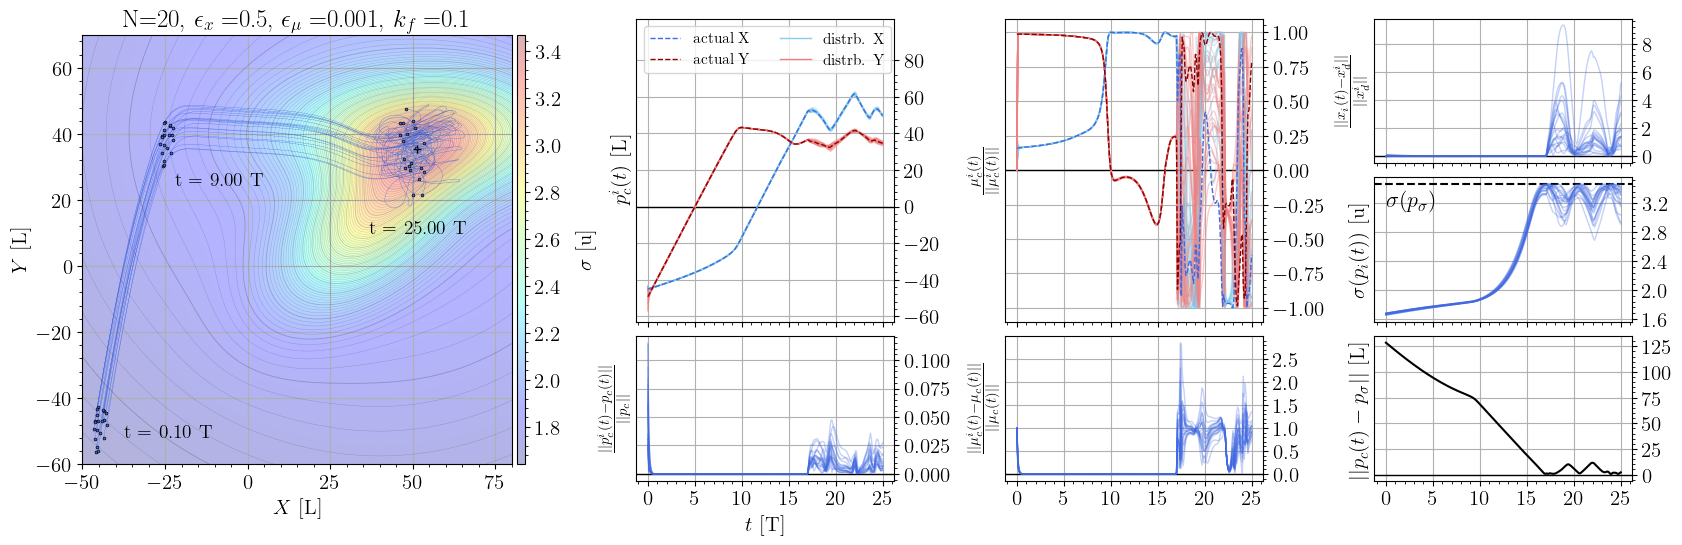

In [5]:
# Load previously saved simulation data from the specified file
simulation_data, settings = load_sim(SIMDATA1, debug=False, max_size_mb=20, verbose=False)

# Initialize the plotter with the loaded simulation data
plotter = PlotterSimDataSI(
    simulation_data, settings,
    dpi=100, figsize=(20,6), xlims=[-50,80], ylims=[-60,70]
)

# Generate and display the plot
ax = plotter.draw(alpha=1, t_list=[0.1,9,25], text_offsets=[[21,-2], [16,-12], [2, -23]])

plt.show()

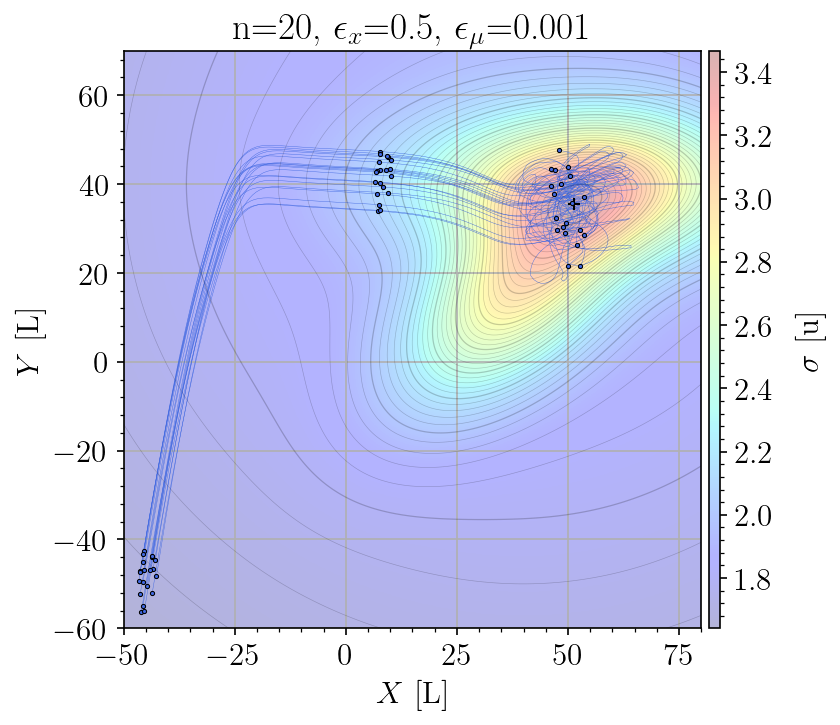

In [6]:
# ---- SI simulation (plot)

# Initialize the plotter with the loaded simulation data
plotter = PlotterSimBasicSI(
    simulation_data, settings, 
    dpi=150, figsize=(6,5), xlims=[-50,80], ylims=[-60,70]
)

# Generate and display the plot
ax = plotter.draw(num_patches=3)

plt.show()

## Simulation with missing robots (not stable)

In [ ]:
# ---- Single integrator simulation setup

# Define the initial state
N = 30

pc = np.array([-40,52])
p = XY_distrib(N, pc, np.array([7,4]))
x0 = [p]

# Define the graph
Z = gen_Z_random(N, rounds=6, seed=2024)
graph = Graph(N, Z)
# print("Z =", Z)
# print(graph.lambda2)

# Define the scalar field
k, mu, dev = 0.06, [35,-35], 20
scalar_field = SigmaNonconvex(k=k, dev=dev, mu=mu, a=[1.5,0], b=[-1,-1])

# Controller settings
speed = 10
ep_x, ep_mu = 0.5, 0.001

# Simulation time step
dt = 0.0001

In [ ]:
# ---- Run the simulation and save data

# Select and initialize the robot model and the estimator
robot_model = SourceSeekingSI(x0, scalar_field, graph, epsilon_x=ep_x, epsilon_mu=ep_mu)

# Initialize the controller
controller = SourceSeekingDistrSI(scalar_field, graph, speed, p, 0.1) #TODO: log scalar_field 

# Then, construct the Simulator Engine
simulator = SimulationEngine(robot_model, controller, time_step=dt, 
                             log_filename=SIMDATA_FILE2, log_time_step=0.1)

# --------------------------------
tf = 30

steps = 8
for step in range(steps):
    graph.kill_agents(random.choice(range(N)))
    simulator.run(tf/steps)
# --------------------------------

Running simulation: 100%|██████████| 37500/37500 [00:08<00:00, 4539.12it/s]


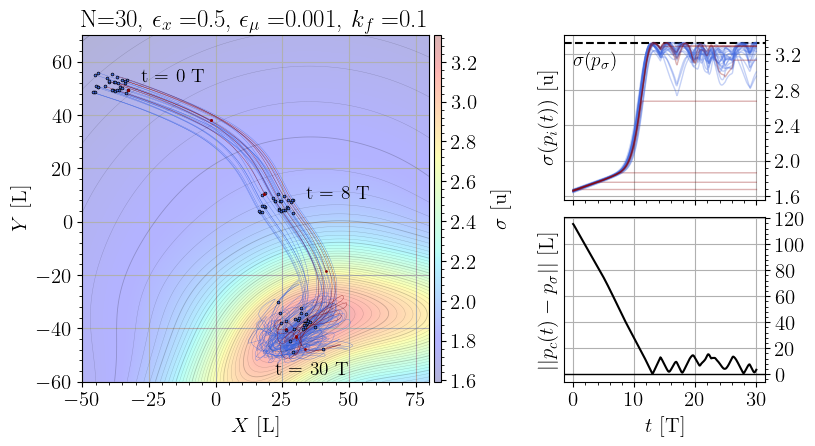

In [2]:
# Load previously saved simulation data from the specified file
simulation_data, settings = load_sim(SIMDATA_FILE2, debug=False, max_size_mb=20, verbose=False)

# Initialize the plotter with the loaded simulation data
plotter = PlotterSimData2SI(
    simulation_data, settings,
    dpi=100, figsize=(13,4.5), xlims=[-50,80], ylims=[-60,70]
)
ax = plotter.draw(t_list=[0,8,30], text_offsets=[[23,3], [23,4], [5, -17]])
plt.show()